## **Cluster Analysis**

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA630/refs/heads/master/data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
## drop ID
df = df.drop('CustomerID', axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [3]:
## encode (dummy)
df = pd.get_dummies(df, drop_first=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


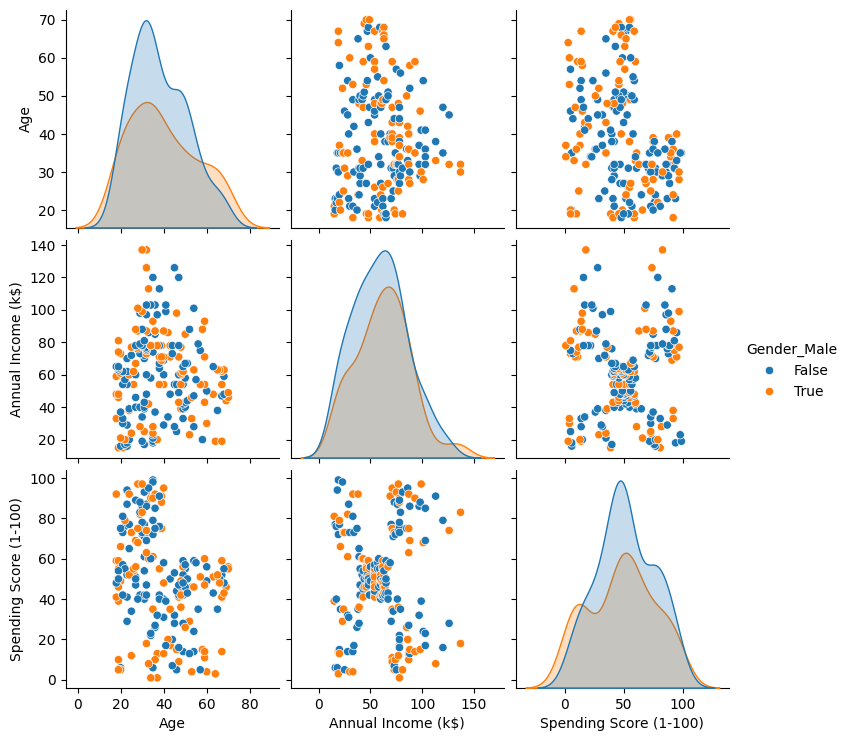

In [4]:
## seaborn
import seaborn as sns

sns.pairplot(df, hue = "Gender_Male")

## scatter plot matrices work when p < 10
## if p is large: get principal components (PC1, PC2). Scatter plot of PC1 vs PC2 to check for segments
## helpful to determine: number of segments (k)

In [6]:
## Analyze customer 0:
cust1 = df.iloc[0].astype('int')
cust1

,0
Age,19
Annual Income (k$),15
Spending Score (1-100),39
Gender_Male,1


In [7]:
## Analyze customer 1:
cust2 = df.iloc[1].astype('int')
cust2

,1
Age,21
Annual Income (k$),15
Spending Score (1-100),81
Gender_Male,1


In [8]:
## Analyze customer 196
cust3 = df.iloc[196].astype('int')
cust3

,196
Age,45
Annual Income (k$),126
Spending Score (1-100),28
Gender_Male,0


## **Distances**

In [10]:
## L2 Norm
np.linalg.norm(cust1 - cust2)

np.float64(42.04759208325728)

In [11]:
## L2 Norm
np.linalg.norm(cust1 - cust3)

np.float64(114.53820323368095)

In [12]:
## L1 Norm
np.linalg.norm(cust1 - cust3, ord=1)

np.float64(149.0)

In [17]:
## Statistical distance
# df.corr() ## correlation matrix is the COV / std deviations  (to standardize)
# df.cov()  ## not standardized
(cust1 - cust2).T.dot(np.linalg.inv(df.cov())).dot(cust1 - cust2)

np.float64(3.1602348969137606)

In [18]:
## Statistical distance
# df.corr() ## correlation matrix is the COV / std deviations  (to standardize)
# df.cov()  ## not standardized
(cust1 - cust3).T.dot(np.linalg.inv(df.cov())).dot(cust1 - cust3)

np.float64(27.164463569174313)

In [19]:
## Clustering
#### metric (distance metric used): l1 (manhattan), l2 (euclidean), statistical (mahalanobis), cosine (dot product)

### **Agglomerative**

Classical clustering technique. Bottom up approach. You start with no clusters, and assigning obs to different clusters. You need to specify the number of clusters to have.


In clustering we do not want one variable to dominate. So, we standardize (normalize).

The metric can be generally: L1, L2, Statistical, Cosine
The linkage can be generally: min, max, average, centroid, ward (variance of the obs in the cluster)

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering  ## main class to do classical clustering

## instance
ac = AgglomerativeClustering(n_clusters = 5, metric = "euclidean", linkage = "ward")

## assign obs to clusters
ac_assignment = ac.fit_predict(df)
ac_assignment

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

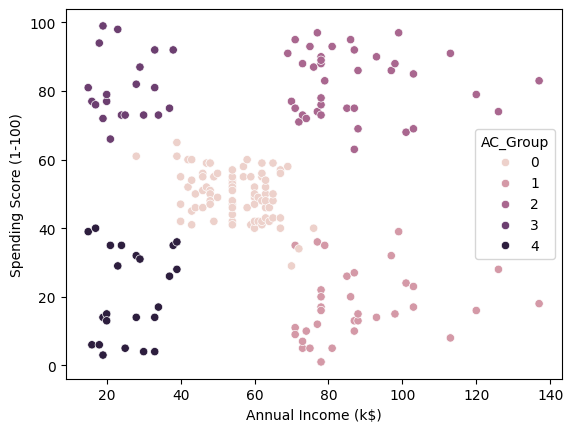

In [21]:
df['AC_Group'] = ac_assignment

## visualize
sns.scatterplot(data = df, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "AC_Group")

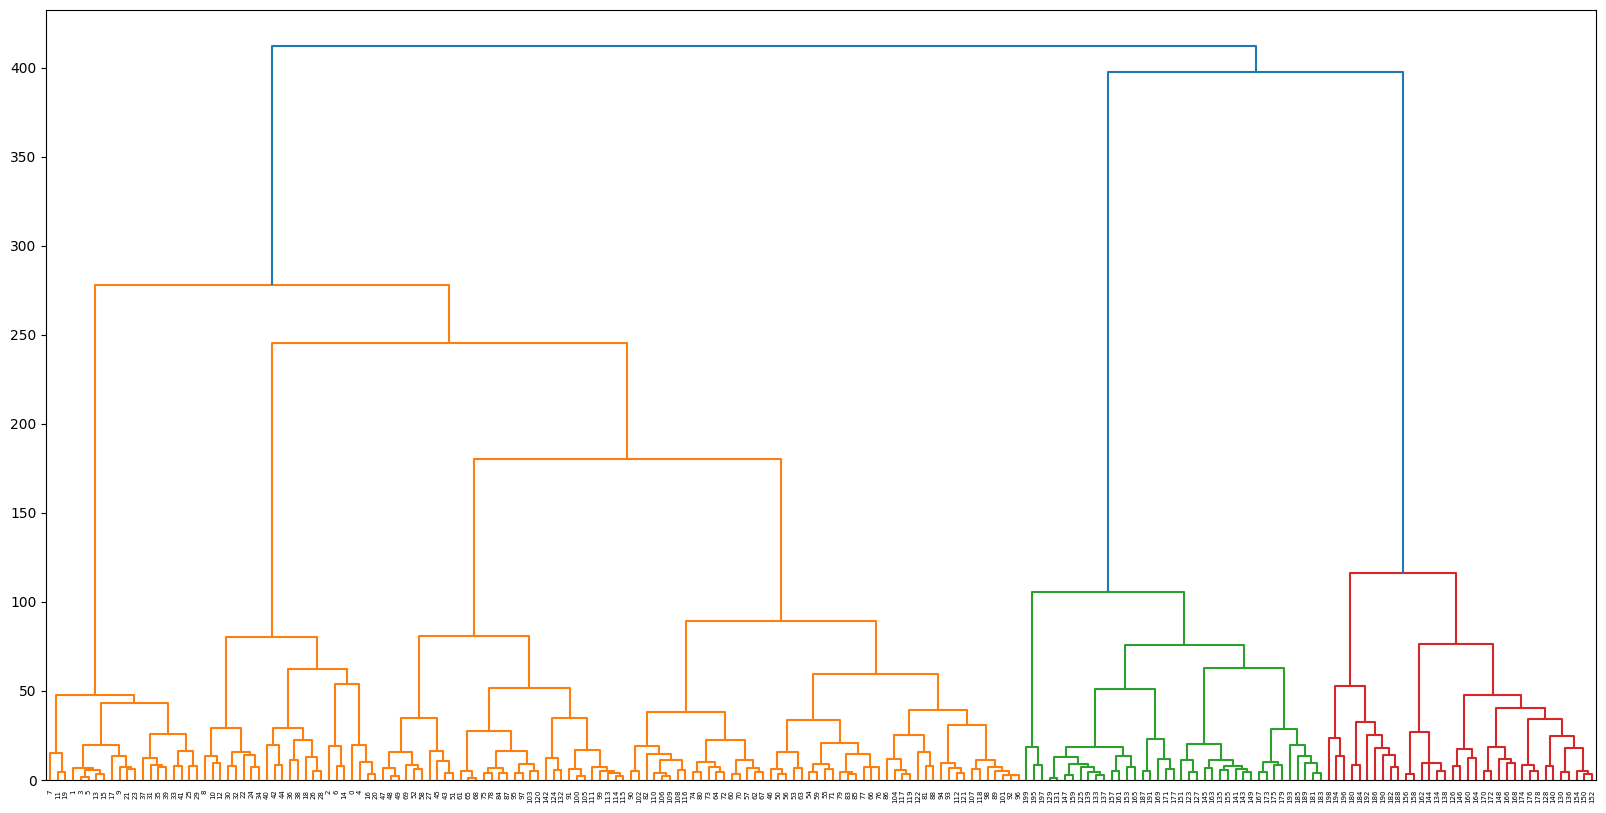

In [23]:
## Dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
linkage_data = linkage(df, method = "ward", metric = "euclidean")
dendrogram(linkage_data)
plt.show()

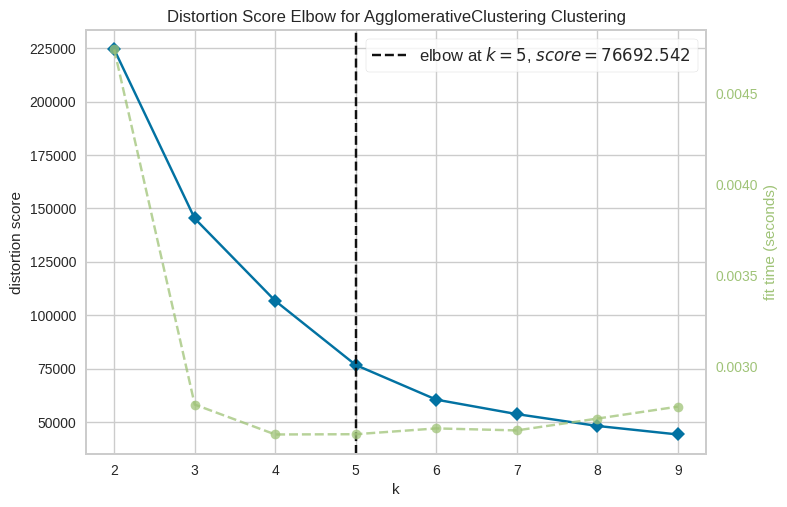

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
## Elbow Plot
from yellowbrick.cluster import KElbowVisualizer

model = KElbowVisualizer(AgglomerativeClustering(metric = "euclidean"), k = (2,10))
model.fit(df)
model.show()

### **Example with sentiment and clustering text data**

In [26]:
## Reviews
#### positive, negative
#### recommendation
review1 = "Outstanding performance and unbeatable value for the price"  # positive
review2 = "Arrived defective and lacked feautures" # negative
review3 = "I was impressed by the exceptional build, and outstanding performance" # positive
review4 = "Looks impressive and well-designed, but unfortunately fails to deliver when it matters"  ## negative

Reviews = [review1, review2, review3, review4]  ## vectorize (list or df['Reviews'])

In [27]:
## vectorizing: convert to a vector numeric
## tokens: (variables) [Outstanding, performance, defective, ]
## every review is an obs and tokens will be variables

## CountVectorizer  (how many)
## TF-IDF           (fractions)

from sklearn.feature_extraction.text import CountVectorizer

## instance
vectorizer = CountVectorizer(stop_words = 'english', max_features=8)

## fit and transform
X = vectorizer.fit_transform(Reviews)

In [28]:
## sparse matrix by default
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 10 stored elements and shape (4, 8)>

In [29]:
## to change to a dense matrix .todense()
X.todense()

matrix([[0, 0, 0, 0, 0, 0, 1, 1],
        [1, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 1, 1],
        [0, 0, 0, 1, 1, 0, 0, 0]])

In [30]:
## tokens
vectorizer.get_feature_names_out()

array(['arrived', 'build', 'defective', 'deliver', 'designed',
       'exceptional', 'outstanding', 'performance'], dtype=object)

In [31]:
pd.DataFrame(X.todense(), columns = vectorizer.get_feature_names_out())

,arrived,build,defective,deliver,designed,exceptional,outstanding,performance
0,0,0,0,0,0,0,1,1
1,1,0,1,0,0,0,0,0
2,0,1,0,0,0,1,1,1
3,0,0,0,1,1,0,0,0


In [32]:
## pre-trained embedding model
from sentence_transformers import SentenceTransformer

model_embedding = SentenceTransformer('all-MiniLM-L6-v2')

X = model_embedding.encode(Reviews)
X

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

array([[-0.05215912,  0.05098662, -0.09784721, ..., -0.2044933 ,
        -0.03102042,  0.07591396],
       [ 0.00076309,  0.03056687,  0.05583911, ...,  0.02758403,
         0.02350756, -0.03569031],
       [-0.05760148,  0.07464454,  0.01028151, ..., -0.04448741,
        -0.0327197 ,  0.07620482],
       [-0.03344904,  0.06423126,  0.01333224, ..., -0.08078485,
        -0.00404184,  0.08259457]], dtype=float32)

In [33]:
X.shape

(4, 384)